In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [4]:
# Load .env enviroment variables
load_dotenv()

True

In [5]:
#  Part 1 - Personal Finance Planner

# setting Current assets BTC and ETH
my_btc = 1.2
my_eth = 5.3

In [6]:
 # Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetching the current BTC Price
btc_data = requests.get(btc_url).json()
btc_data
btc_price = btc_data['data']['1']['quotes']['CAD']['price']
btc_price

27541.313

In [8]:
# Fetching the current ETH Price
eth_data = requests.get(eth_url).json()
eth_data
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']
eth_price

1498.719972

In [9]:
# Compute the portfolio value of cryptocurrencies
crypto_portfolio_value = (my_btc*btc_price)+(my_eth*eth_price)
crypto_portfolio_value

40992.791451599995

In [10]:
# Print current crypto  balance
print(f"The current value of your {my_btc} BTC is ${(my_btc*btc_price):0.2f}")
print(f"The current value of your {my_eth} ETH is ${(my_eth*eth_price):0.2f}")

The current value of your 1.2 BTC is $33049.58
The current value of your 5.3 ETH is $7943.22


In [11]:
# Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

# Create two variables to store shares of SPY and AGG Bonds
my_agg = 200
my_spy = 50

In [12]:
#Loading dotenv to access ALPACA key and secret key

load_dotenv(dotenv_path='C:/Users/panka/Documents/June18th/.env.txt')

# Setting the Alpaca API key and ALPACA secret key variables to use ALPACA data
alpaca_api_key = os.getenv("ALPACA_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [13]:
#Displaying ALPACA Key
alpaca_api_key

'PKLKGDHI5PYRI89FRKQ5'

In [14]:
#Displaying ALPACA Secret Key
alpaca_secret_key

'8BEwcV1DrSAX9wxWswvvMUo388uPCPow8b6B5zSL'

In [15]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [16]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-17", tz="America/New_York").isoformat()

In [17]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-06-17 04:00:00+00:00,100.42,100.57,99.98,100.34,9891839,26374,100.372650,AGG
2022-06-17 04:00:00+00:00,365.43,369.38,362.17,365.86,109255759,821350,366.263193,SPY


In [21]:
# Reorganizing the DataFrame df_portfolio

# Separate ticker data
agg = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
spy= df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([agg, spy],axis=1, keys=['AGG','SPY'])

# Display sample data of concatenated Dataframe
df_portfolio

AGG                                              \
                             open    high    low   close   volume trade_count   
timestamp                                                                       
2022-06-17 04:00:00+00:00  100.42  100.57  99.98  100.34  9891839       26374   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-06-17 04:00:00+00:00  100.37265  365.43  369.38  362.17  365.86   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2022-06-17 04:00:00+00:00  109255759      821350  366.263193

In [22]:
# Fetch the current closing prices from the DataFrame for AGG and SPY
agg_price = float(df_portfolio["AGG"]["close"])
spy_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")


Current AGG closing price: $100.34
Current SPY closing price: $365.86


In [23]:
# Compute the current value of shares
portfolio_value = (agg_price*my_agg)+(spy_price*my_spy)
portfolio_value = round(portfolio_value,2)
portfolio_value

38361.0

In [25]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${(agg_price*my_agg):0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${(spy_price*my_spy):0.2f}")

The current value of your 50 SPY shares is $20068.00
The current value of your 200 AGG shares is $18293.00


In [26]:
# Savings Health Analysis

# Set monthly household income
monthly_income = 12000

# Consolidating financial assets data of Stocks, Bonds and Crypto
amount_data = {
    "amount": [crypto_portfolio_value,portfolio_value]
}

# Set the investment type
inv_type = ["crypto", "shares"]

In [27]:
df_savings = pd.DataFrame(amount_data, index=inv_type)
df_savings

,amount
crypto,40992.791452
shares,38361.000000


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

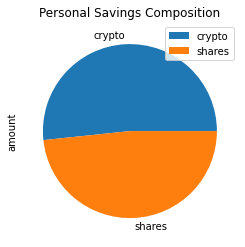

In [28]:
# Plot savings pie chart to visualize the composition of personal savings account

df_savings.plot.pie(y="amount", title="Personal Savings Composition")

In [29]:
# Set ideal emergency fund to 3 months of Monthly Income
emergency_fund = monthly_income * 3

In [30]:
# Calculate total amount of savings
total_savings = crypto_portfolio_value + portfolio_value
total_savings

79353.7914516

In [31]:
# Validate Savings health using if else conditional
if total_savings > emergency_fund:
    print("congratulations, you have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("congratulations, you have achieved your financial goal.")
else:
    print(f"You are ${emergency_fund-total_savings} away from reaching your financial goal")

congratulations, you have enough money in your emergency fund.


In [32]:
# Part 2 - Retirement Planning

# Monte Carlo Simulation

# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [55]:
# Get 5 years' worth of historical data for SPY and AGG

portfolio_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

portfolio_data.head()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.61,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.81,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.86,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.14,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.97,2718710,12697,111.031967,AGG


In [56]:
# Reorganize the DataFrame
# Separate ticker data
agg = portfolio_data[portfolio_data['symbol']=='AGG'].drop('symbol', axis=1)
spy= portfolio_data[portfolio_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
portfolio_data = pd.concat([agg, spy],axis=1, keys=['AGG','SPY'])

# Display sample data of concatenated Dataframe
portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [48]:
#Import MCSimulation
from MCForecastTools import MCSimulation


In [123]:

# Set number of simulations to 500 and weights to 40% to AGG and 60% to SPY 
num_sims = 500
weights = [2/5,3/5]

# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
mc_portfolio = MCSimulation(
    portfolio_data = portfolio_data,
    weights = weights,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [124]:
# Run Monte Carlo simulations to forecast 30 years cumulative returns
mc_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\panka\APIs_June18\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004336,1.010569,0.993161,0.992187,1.000707,1.001036,0.996684,1.004279,1.010090,1.004064,...,1.008775,0.990318,0.999977,1.006310,1.005856,1.005383,1.004786,0.985771,1.003662,0.998511
2,1.012469,1.009930,1.004244,1.000540,0.994157,1.006799,1.013247,1.009262,1.018918,0.995979,...,1.002110,0.985026,1.007824,0.987556,0.991407,1.008588,1.007485,0.990411,1.002551,0.999943
3,1.015192,1.012052,0.992673,0.992222,1.002824,0.999234,1.013081,0.997753,1.009495,1.007311,...,1.014597,0.975214,1.007474,0.991670,0.993206,1.002734,1.019379,0.993165,1.011571,0.992912
4,1.019414,1.015248,0.993736,0.990864,1.002561,1.000056,1.013308,0.996904,1.013014,1.011448,...,1.019301,0.976702,0.998581,0.989415,0.984578,0.984792,1.012163,0.978783,0.995923,0.992244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.389301,11.092250,7.697156,20.292131,9.358787,16.403529,15.129794,15.716625,27.131971,12.654869,...,22.201046,11.839874,11.945164,16.308621,7.107582,7.963315,20.416728,17.289400,9.651885,18.037016
7557,14.342702,11.168716,7.627787,20.421842,9.432423,16.365536,14.792812,15.681275,27.108751,12.690805,...,22.108043,11.823472,12.003441,16.320065,7.142063,7.891032,20.216813,17.190673,9.647052,18.047373
7558,14.376519,11.292969,7.571131,20.374083,9.447169,16.314666,14.909556,15.535019,27.391994,12.720902,...,21.967065,11.938704,12.021821,16.230654,7.164873,7.790205,20.132399,17.413915,9.732136,18.169124
7559,14.513530,11.313089,7.570277,20.278143,9.465394,16.444421,15.033200,15.358165,26.916236,12.720896,...,22.046491,12.114391,12.027060,16.200689,7.114280,7.674536,20.120363,17.420217,9.701937,18.150357


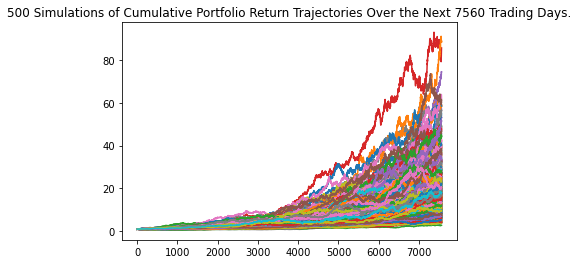

In [125]:
# Plot simulation outcomes
sim_plot = mc_portfolio.plot_simulation()

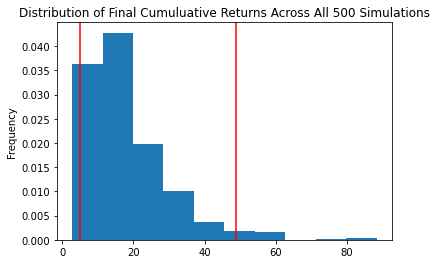

In [126]:
# Plot probability distribution and confidence intervals
dist_plot = mc_portfolio.plot_distribution()

In [127]:
# Retirement Analysis

# summary statistics for the Monte Carlo simulation
portfolio_summary = mc_portfolio.summarize_cumulative_return()

# Print summary statistics
print(portfolio_summary)

count           500.000000
mean             18.287073
std              11.792519
min               2.789923
25%              10.443086
50%              15.250599
75%              22.883994
max              88.318801
95% CI Lower      4.898863
95% CI Upper     48.715655
Name: 7560, dtype: float64


In [128]:
# Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
portfolio_ci_lower = round(portfolio_summary[8]*20000,2)
portfolio_ci_upper = round(portfolio_summary[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${portfolio_ci_lower} and ${portfolio_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $97977.25 and $974313.09


In [129]:
# Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

# Set initial investment to 50% more 
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
portfolio_ci_lower = round(portfolio_summary[8]*30000,2)
portfolio_ci_upper = round(portfolio_summary[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${portfolio_ci_lower} and ${portfolio_ci_upper}")


There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $146965.88 and $1461469.64


In [130]:
# Forecast Cumulative Returns in 10 Years

# Set number of simulations to 500 and weights to 80% to SPY and 20% to AGG
num_sims = 500
weights_new = [1/5,4/5]

# Configure a new Monte Carlo simulation to forecast 10 years cumulative returns
mc_portfolio_new = MCSimulation(
    portfolio_data = portfolio_data,
    weights = weights_new,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [131]:
# Run new Monte Carlo simulations to forecast 10 years cumulative returns
mc_portfolio_new.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\panka\APIs_June18\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008919,1.001412,0.985885,0.992400,1.012669,1.010157,1.011405,0.989910,0.998416,1.005195,...,1.006062,1.006789,1.009127,1.000576,0.984081,1.018536,0.996449,0.998025,0.988234,1.001382
2,0.999488,1.012430,0.986794,0.972531,1.016975,1.011247,1.011168,0.999378,1.010730,1.014846,...,0.999860,1.010764,1.000997,1.012541,0.975882,1.019518,1.001103,1.014536,0.987893,1.034490
3,1.004176,1.028504,0.974422,0.966344,1.016413,1.015948,1.008795,1.000354,1.010385,1.029481,...,0.991163,1.026018,1.001260,1.010723,0.962569,1.006353,1.012615,1.017626,0.999138,1.034864
4,1.006365,1.033949,0.984367,0.968957,1.007753,1.024671,0.989599,0.998651,1.010352,1.020778,...,0.984959,1.021504,1.014402,1.018720,0.942735,1.000474,1.019201,1.012357,1.005387,1.036957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.056094,6.282781,2.975726,9.309106,1.027693,1.906202,4.260058,2.635165,3.861730,6.696623,...,2.208448,1.574615,3.794224,3.309979,2.282217,3.720830,1.991971,2.890076,3.451562,2.811774
2517,4.060098,6.144131,2.960284,9.352572,1.041488,1.916223,4.313088,2.626611,3.880220,6.683164,...,2.208536,1.563877,3.830215,3.316839,2.289225,3.777869,1.997838,2.890364,3.510585,2.827194
2518,4.008688,6.106849,3.003485,9.271294,1.039373,1.881754,4.355338,2.590543,3.895898,6.643625,...,2.233947,1.536163,3.844160,3.337905,2.306860,3.752597,1.991845,2.885646,3.519625,2.852012
2519,3.958862,6.212166,3.015021,9.339759,1.044178,1.875147,4.407580,2.583291,3.917532,6.613311,...,2.277005,1.529834,3.847611,3.293550,2.294541,3.782809,2.035466,2.910524,3.517621,2.900658


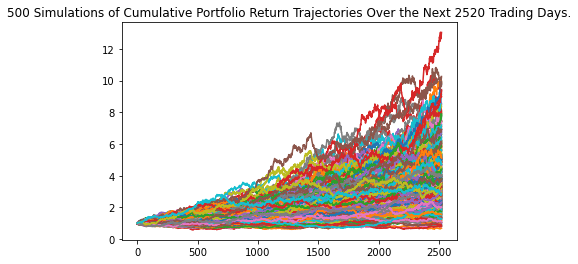

In [132]:
# Plot new simulation outcomes
sim_plot_new = mc_portfolio_new.plot_simulation()

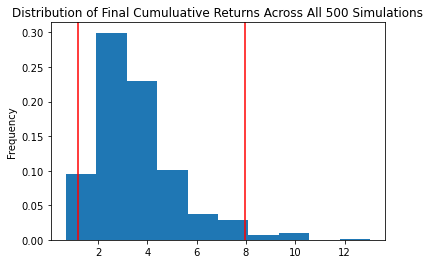

In [133]:
# Plot probability distribution and confidence intervals
dist_plot_new = mc_portfolio_new.plot_distribution()

In [134]:
# summary statistics for the new Monte Carlo simulation
portfolio_summary_new = mc_portfolio_new.summarize_cumulative_return()

# Print summary statistics
print(portfolio_summary_new)

count           500.000000
mean              3.527637
std               1.725448
min               0.689689
25%               2.348580
50%               3.210545
75%               4.238238
max              13.039152
95% CI Lower      1.189789
95% CI Upper      7.946916
Name: 2520, dtype: float64


In [135]:
# Calculate the expected new portfolio return at the `95%` lower and upper confidence intervals based on a `$30,000` initial investment.

# Set initial investment
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our 60,000
portfolio_ci_lower_new = round(portfolio_summary_new[8]*30000,2)
portfolio_ci_upper_new = round(portfolio_summary_new[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${portfolio_ci_lower_new} and ${portfolio_ci_upper_new}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $35693.67 and $238407.47


In [136]:
# Calculate the expected new portfolio return at the `95%` lower and upper confidence intervals based on a `$60,000` initial investment.

# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
portfolio_ci_lower_new = round(portfolio_summary_new[8]*60000,2)
portfolio_ci_upper_new = round(portfolio_summary_new[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${portfolio_ci_lower_new} and ${portfolio_ci_upper_new}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71387.34 and $476814.94


In [ ]:
# Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

# The lower and upper bounds for  the expected value of the portfolio with 95% confidence interval is $35693.67 and $238407.47


-------------------------------------------------------


# Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?

# No. The new portfolio which is more heavy towards stocks will not allow the credit union members to retire earlier.
# As seen above in the new portfolio, An initial investment of $30,000 would be returning anywhere between $35k to $238k
# This strategy is not a good strategy as it is not taking into account the compounding of the portfolio which makes portfolio grow over time.
# Even with double the initial investment, the returns would not be close to 30 years return even if the credit union members decide to invest more in riskier assets.
